# |Global Power Plant Database - DS2306-Date-04-11-23-Sudhanshu Kumar Singh|

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [88]:
# Load the dataset
data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/database_IND.csv")

In [89]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [90]:
#checking the data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [91]:
# statistics for numerical columns
data.describe()


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [92]:
#checking the misisng vlaue 
print(data.isnull().sum())

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [93]:
#fill the missing value with mean
data.fillna(data.mean(), inplace=True)

C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_11512\4272435718.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [94]:
print(data.isnull().sum())

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [95]:
#list of columns to drop 
columns_to_drop=['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel2',
                 'other_fuel2','other_fuel3','year_of_capacity_data','other_fuel1']

In [96]:
#droping the columns
data=data.drop(columns_to_drop, axis=1)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      907 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      888 non-null    object 
 13  generation_gwh_2014     907 non-null    float64
 14  generation_gwh_2015     907 non-null    fl

In [99]:
#find unique value of owner       
owner_unique=data['owner'].unique()
print(owner_unique)

['Solar Paces' 'Ultratech Cement ltd' 'AES' nan 'Hindustan Pvt lt'
 'Dr Ssk ltd' 'Ashok Ssk ltd' 'Shree Sugars ltd'
 'Ener-t International Ltd.' 'Nav Bharat Buildcon Private Limited'
 'MEIL Green Power Limited' 'Madras Cement Limited'
 'DDE Renewable Energy Private Limited (DREPL)'
 'Electromech Maritech Private Limited'
 'Finehope Allied Engineering Private Limited'
 'Khaya Solar Projects Private Limited' 'Newton Solar Private Limited'
 'Saidham Overseas Private Limited' 'Vasavi Solar Power Private Limited'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Bharat Petroleum Corporation Limited'
 'Bhilwara Energy Limited' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Dr Babasaheb Ambedkar SSK Limited' 'AEW Infratech Private Limited'
 'Enercon India Ltd.' 'Green 

In [100]:
#find unique value of geolocation_source  
geolocation_source_unique=data['geolocation_source'].unique()
print(geolocation_source_unique)

['National Renewable Energy Laboratory' 'WRI' nan 'Industry About']


In [101]:
#find unique value of geolocation_source  
generation_data_source_unique=data['generation_data_source'].unique()
print(generation_data_source_unique)

[nan 'Central Electricity Authority']


In [115]:
# Fill missing values in object (string) columns with a specified value (e.g., "Unknown")
object_columns = ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
                   'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
data[object_columns] = data[object_columns].fillna("Unknown")

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      907 non-null    float64
 9   owner                   907 non-null    object 
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      907 non-null    object 
 13  generation_gwh_2014     907 non-null    float64
 14  generation_gwh_2015     907 non-null    fl

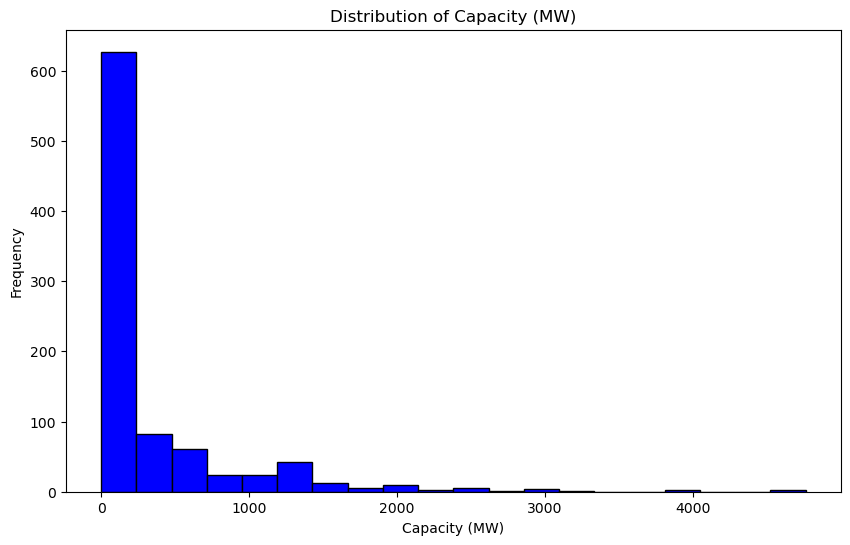

In [118]:
#Histogram of Capacity
plt.figure(figsize=(10, 6))
plt.hist(data['capacity_mw'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

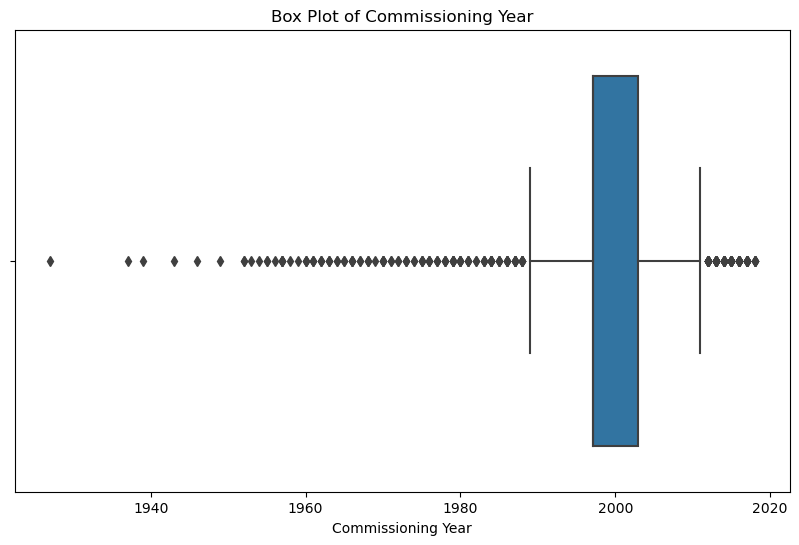

In [105]:
#Box Plot of Commissioning Year
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['commissioning_year'])
plt.title('Box Plot of Commissioning Year')
plt.xlabel('Commissioning Year')
plt.show()

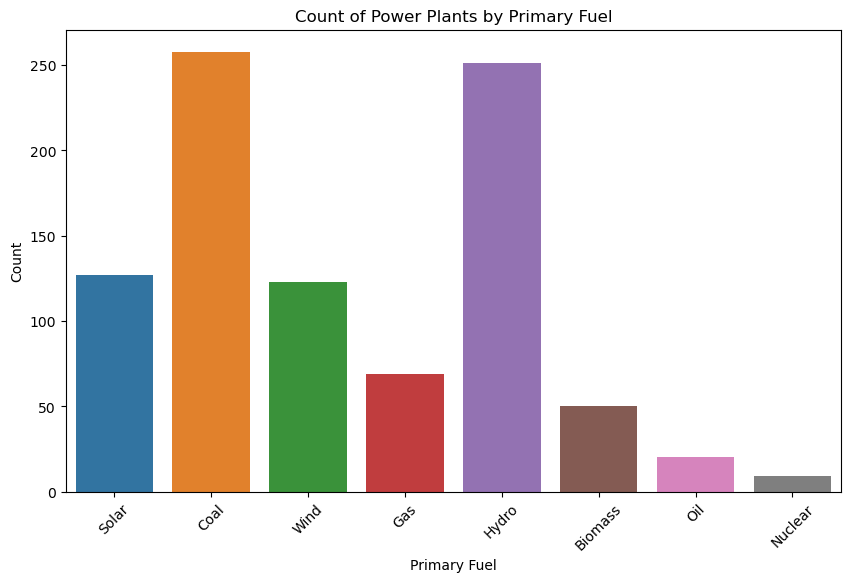

In [106]:
#Bar Plot of Primary Fuel (Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='primary_fuel')
plt.title('Count of Power Plants by Primary Fuel')
plt.xticks(rotation=45)
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.show()

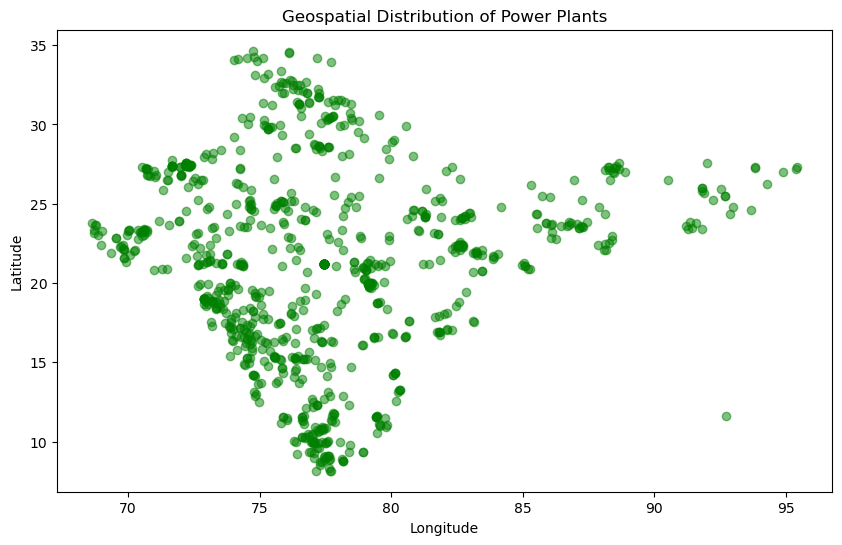

In [107]:
#Scatter Plot of Latitude vs. Longitude (Geospatial)
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c='green', alpha=0.5)
plt.title('Geospatial Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

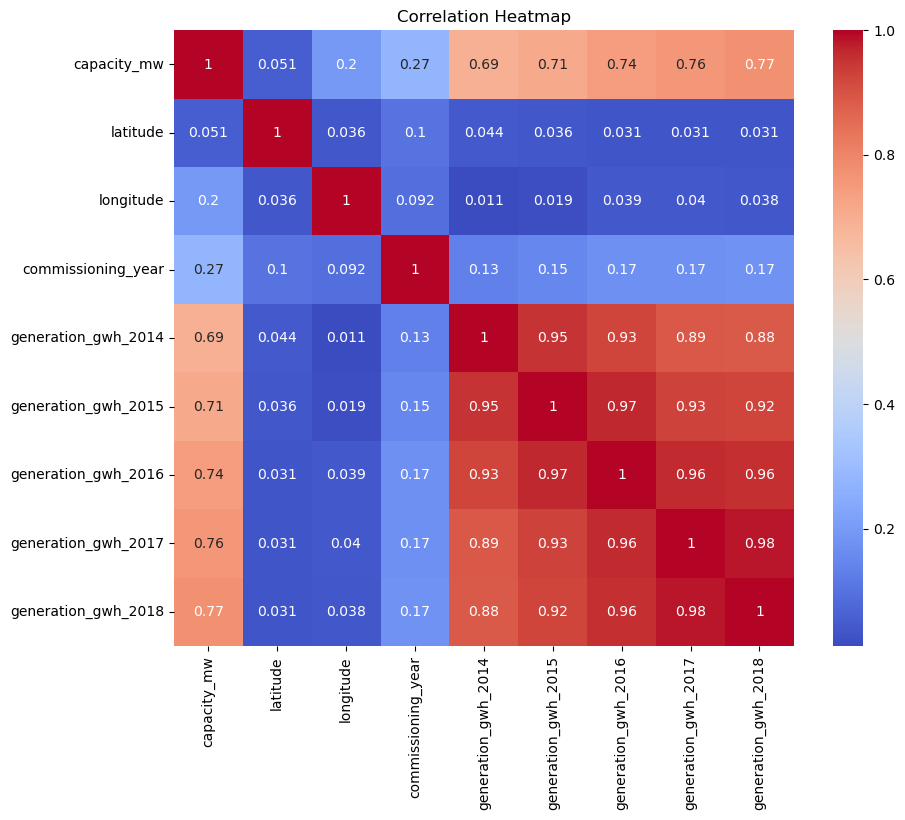

In [108]:
#Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [109]:
# Get columns with object data type
object_columns = data.select_dtypes(include=['object'])

In [110]:
# List the object columns
object_column_names = object_columns.columns.tolist()
print("Object Data Type Columns:", object_column_names)

Object Data Type Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [124]:
# Feature selection
features = ['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016',
            'generation_gwh_2017','generation_gwh_2016']

In [126]:
# Define the target variable (y) and features (X)
X = data[features]
y = data['capacity_mw']

In [127]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Create and train a Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [129]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)